# Solución Caso Práctico de análisis de datos para VML

In [814]:
# 1.1
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from prophet import Prophet

# Importación de los datos
### 1.1
Primero cargamos los datos, en este caso estoy cargando cada tabla en un diferente df.

In [966]:
#Primero importamos la información
xls = pd.ExcelFile(r"D:\Busqueda_trabajo\Prueba VML\bbdd.xlsx")
df_instagram = pd.read_excel(xls, 'Instagram')
df_facebook = pd.read_excel(xls, 'Facebook')

In [968]:
#Revisamos la extructura de los datos
print("-----------Instagram-----------")
print(df_instagram.info())
print("\n-----------Facebook-----------")
print(df_facebook.info())

-----------Instagram-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year_month         24 non-null     object
 1   Total_Post_count   24 non-null     int64 
 2   Post_count_photo   24 non-null     int64 
 3   Post_count_video   24 non-null     int64 
 4   Comments count     24 non-null     int64 
 5   Shares             24 non-null     int64 
 6   Video views        24 non-null     int64 
 7   Interactions       24 non-null     int64 
 8   Media reach        24 non-null     int64 
 9   Media impressions  24 non-null     int64 
 10  Page fans          24 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.2+ KB
None

-----------Facebook-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------  

In [970]:
#Solo ver 2 decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [972]:
df_instagram

,year_month,Total_Post_count,Post_count_photo,Post_count_video,Comments count,Shares,Video views,Interactions,Media reach,Media impressions,Page fans
0,2023-01,5,1,4,137,330,0,2529,18709,10515,156100
1,2023-02,16,9,7,68,172,0,1390,35529,9785,516624
2,2023-03,19,9,10,91,292,0,1818,44208,11703,595008
3,2023-04,8,1,7,211,350,0,2064,24783,0,266464
4,2023-05,13,9,4,24,35,0,693,15678,7707,440440
5,2023-06,8,7,1,19,3,0,365,7723,6874,275376
6,2023-07,14,11,3,16,11,0,521,13289,9987,494172
7,2023-08,25,21,4,43,62,0,1162,24997,12994,894625
8,2023-09,20,16,4,46,43,0,922,22738,12577,0
9,2023-10,2,1,1,10,95,0,276,6166,0,72502


In [974]:
df_facebook

,year_month,Total_Post_count,Post_count_photo,Post_count_video,Comments on posts,Shares on posts,Post link clicks,Video views,Total post reactions,Post reach,Post impressions
0,2023-01,3,3,0,0,8,2,0,36,8084,8183
1,2023-02,3,2,1,102,49,380,1342073,1906,2940310,24984407
2,2023-03,14,7,7,217,164,2000,2132839,11913,18375019,57486994
3,2023-04,4,2,2,5,12,0,710,65,9787,10348
4,2023-05,5,4,1,4,25,0,298,60,16091,16947
5,2023-06,4,3,1,0,16,0,205,40,13090,13829
6,2023-07,8,5,3,8,20,1,1016,86,28557,30421
7,2023-08,6,5,1,36,31,1,287,145,34990,36359
8,2023-09,3,3,0,24,5,0,0,77,20159,20425
9,2023-11,2,2,0,6,4,0,0,38,19124,19702


# 1.2.
## Instagram
- Para identificar valores faltantes lo primero que hacemos en revisar si hay algún valor nulo, que en este caso no tenemos.
- Borramos Video Views, ya que todas las filas están faltando.
- Al analizar los tipos de datos nos damos cuenta que "year_month" es string y no date.
- En df_instagram nos damos cuenta que hay información que falta en las columnas "Video Views", "Media impressions", y "Page Fans". 

- El alcance es mayor que las impresiones, lo que es muy poco probable, por eso se tiene que intercambiar las columnas.
- Para Media impressions y Page fans, vamos a autorrellenar la información faltante con el promedio de cada post. Para esto divimos las impresiones y los fans por cantidades de posts y le sacamos el promedio.

In [977]:
df_facebook.isnull().sum()

year_month              0
Total_Post_count        0
Post_count_photo        0
Post_count_video        0
Comments on posts       0
Shares on posts         0
Post link clicks        0
Video views             0
Total post reactions    0
Post reach              0
Post impressions        0
dtype: int64

In [979]:
df_instagram.isnull().sum()

year_month           0
Total_Post_count     0
Post_count_photo     0
Post_count_video     0
Comments count       0
Shares               0
Video views          0
Interactions         0
Media reach          0
Media impressions    0
Page fans            0
dtype: int64

In [981]:
# No tenemos información en las vistas de videos, entonces borramos la columna
df_instagram = df_instagram.drop(columns = "Video views")

In [983]:
# Convertir a datetime 
df_instagram["year_month"] = pd.to_datetime(df_instagram["year_month"] + "-01", format="%Y-%m-%d")
df_instagram.dtypes

year_month           datetime64[ns]
Total_Post_count              int64
Post_count_photo              int64
Post_count_video              int64
Comments count                int64
Shares                        int64
Interactions                  int64
Media reach                   int64
Media impressions             int64
Page fans                     int64
dtype: object

In [985]:
# Después de analizar la información, se llegó a la conclusión que el alcance no puede ser mayor a las impresiones, por lo que se intercambiaron los datos
df_instagram[["Media reach", "Media impressions"]] = df_instagram[["Media impressions", "Media reach"]]

In [987]:
(df_instagram["Media reach"] > df_instagram["Media impressions"])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

In [989]:
df_instagram

,year_month,Total_Post_count,Post_count_photo,Post_count_video,Comments count,Shares,Interactions,Media reach,Media impressions,Page fans
0,2023-01-01,5,1,4,137,330,2529,10515,18709,156100
1,2023-02-01,16,9,7,68,172,1390,9785,35529,516624
2,2023-03-01,19,9,10,91,292,1818,11703,44208,595008
3,2023-04-01,8,1,7,211,350,2064,0,24783,266464
4,2023-05-01,13,9,4,24,35,693,7707,15678,440440
5,2023-06-01,8,7,1,19,3,365,6874,7723,275376
6,2023-07-01,14,11,3,16,11,521,9987,13289,494172
7,2023-08-01,25,21,4,43,62,1162,12994,24997,894625
8,2023-09-01,20,16,4,46,43,922,12577,22738,0
9,2023-10-01,2,1,1,10,95,276,0,6166,72502


In [991]:
# Rellenamos Media reach usando la relación promedio entre Media reach y Media impressions
valid_data = df_instagram[df_instagram["Media reach"] > 0]
avg_ratio = valid_data["Media reach"].mean() / valid_data["Media impressions"].mean()

df_instagram.loc[df_instagram["Media reach"] == 0, "Media reach"] = (
    df_instagram.loc[df_instagram["Media reach"] == 0, "Media impressions"] * avg_ratio
).clip(lower=df_instagram["Interactions"], upper=df_instagram["Media impressions"]).astype(int)

# Rellenamos Page fans usando la media entre fans e impresiones
page_fans_per_reach = (df_instagram.loc[df_instagram["Media impressions"] > 0, "Page fans"] / 
                       df_instagram.loc[df_instagram["Media impressions"] > 0, "Media impressions"]).mean()

df_instagram.loc[df_instagram["Page fans"] == 0, "Page fans"] = (
    df_instagram["Media reach"] * page_fans_per_reach).astype(int)


In [993]:
df_instagram

,year_month,Total_Post_count,Post_count_photo,Post_count_video,Comments count,Shares,Interactions,Media reach,Media impressions,Page fans
0,2023-01-01,5,1,4,137,330,2529,10515,18709,156100
1,2023-02-01,16,9,7,68,172,1390,9785,35529,516624
2,2023-03-01,19,9,10,91,292,1818,11703,44208,595008
3,2023-04-01,8,1,7,211,350,2064,13085,24783,266464
4,2023-05-01,13,9,4,24,35,693,7707,15678,440440
5,2023-06-01,8,7,1,19,3,365,6874,7723,275376
6,2023-07-01,14,11,3,16,11,521,9987,13289,494172
7,2023-08-01,25,21,4,43,62,1162,12994,24997,894625
8,2023-09-01,20,16,4,46,43,922,12577,22738,110032
9,2023-10-01,2,1,1,10,95,276,3255,6166,72502


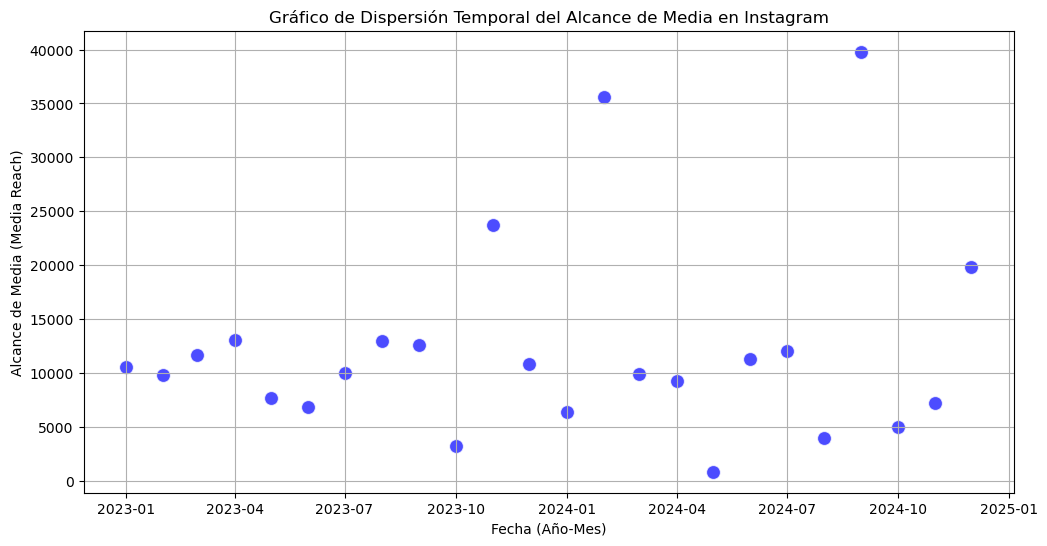

In [995]:
# Creamos un grafico de dispersion para identificar valores que estén fuera de lo común

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_instagram, 
    x="year_month", 
    y="Media reach", 
    s=100,  
    color="blue",  
    alpha=0.7  
)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Alcance de Media (Media Reach)")
plt.title("Gráfico de Dispersión Temporal del Alcance de Media en Instagram")
plt.grid(True)

plt.show()

# Facebook

### En facebook detectamos lo siguiente:
- 2023-02 y 2023-03 son meses en los que probablemente hubieron posts virales que no reflejan la realidad del resto de meses y pueden afectar nuestro analisis
- 2023-12, 2023-12, 2024-02, 2024-07 son meses que faltan en el analisís, muy probablemente por un error en la recolección de datos, ya que es muy poco probable que esos meses no se hubieran hecho publicaciones, por lo que tomé la decisión de rellenar la información faltante usando la mediana.
- Ajuste el tipo de dato de la columna de "year_month".

In [998]:
# Ajustamos los valores en '2023-02', '2023-03'

mask_outliers = df_facebook['year_month'].isin(['2023-02', '2023-03'])
df_normal = df_facebook[~mask_outliers].copy()

df_normal['Vistas_por_video'] = (df_normal['Video views'] / df_normal['Post_count_video'].replace(0, pd.NA)).dropna()
vistas_por_video_promedio = df_normal['Vistas_por_video'].median()
df_facebook.loc[mask_outliers, 'Video views'] = (
    df_facebook.loc[mask_outliers, 'Post_count_video'] * vistas_por_video_promedio
).round().astype(int)  

columnas_ajustar = [
    'Comments on posts', 'Shares on posts', 'Post link clicks',
    'Total post reactions', 'Post reach', 'Post impressions'
]

for col in columnas_ajustar:
    mediana = df_facebook.loc[~mask_outliers, col].median()

    mediana_entera = int(round(mediana)) 
    df_facebook.loc[mask_outliers, col] = mediana_entera

df_facebook[columnas_ajustar] = df_facebook[columnas_ajustar].astype(int)

In [1000]:
df_facebook

,year_month,Total_Post_count,Post_count_photo,Post_count_video,Comments on posts,Shares on posts,Post link clicks,Video views,Total post reactions,Post reach,Post impressions
0,2023-01,3,3,0,0,8,2,0,36,8084,8183
1,2023-02,3,2,1,7,19,0,292,82,16164,16650
2,2023-03,14,7,7,7,19,0,2048,82,16164,16650
3,2023-04,4,2,2,5,12,0,710,65,9787,10348
4,2023-05,5,4,1,4,25,0,298,60,16091,16947
5,2023-06,4,3,1,0,16,0,205,40,13090,13829
6,2023-07,8,5,3,8,20,1,1016,86,28557,30421
7,2023-08,6,5,1,36,31,1,287,145,34990,36359
8,2023-09,3,3,0,24,5,0,0,77,20159,20425
9,2023-11,2,2,0,6,4,0,0,38,19124,19702


In [1002]:
# Agregamos las filas que faltan y rellenamos con la mediana

df_facebook = df_facebook.copy()

fechas_faltantes = ['2023-10', '2023-12', '2024-02', '2024-07']
nuevas_filas = pd.DataFrame({'year_month': fechas_faltantes})

df_facebook = pd.concat([df_facebook, nuevas_filas], ignore_index=True)

df_facebook['year_month'] = pd.to_datetime(df_facebook['year_month'] + '-01')
df_facebook = df_facebook.sort_values('year_month').reset_index(drop=True)
df_facebook['year_month'] = df_facebook['year_month'].dt.strftime('%Y-%m')

# Calcular la mediana de todas las columnas (excluyendo 2023-02 y 2023-03)
mask_outliers = df_facebook['year_month'].isin(['2023-02', '2023-03'])
mediana_general = df_facebook[~mask_outliers].select_dtypes(include=np.number).median().round().astype(int)

columnas_numericas = df_facebook.select_dtypes(include=np.number).columns
df_facebook[columnas_numericas] = df_facebook[columnas_numericas].fillna(mediana_general)

df_facebook[columnas_numericas] = df_facebook[columnas_numericas].astype(int)

In [1004]:
df_facebook

,year_month,Total_Post_count,Post_count_photo,Post_count_video,Comments on posts,Shares on posts,Post link clicks,Video views,Total post reactions,Post reach,Post impressions
0,2023-01,3,3,0,0,8,2,0,36,8084,8183
1,2023-02,3,2,1,7,19,0,292,82,16164,16650
2,2023-03,14,7,7,7,19,0,2048,82,16164,16650
3,2023-04,4,2,2,5,12,0,710,65,9787,10348
4,2023-05,5,4,1,4,25,0,298,60,16091,16947
5,2023-06,4,3,1,0,16,0,205,40,13090,13829
6,2023-07,8,5,3,8,20,1,1016,86,28557,30421
7,2023-08,6,5,1,36,31,1,287,145,34990,36359
8,2023-09,3,3,0,24,5,0,0,77,20159,20425
9,2023-10,6,4,0,7,19,0,0,82,16164,16650


In [1006]:
# Convertir a datetime 
df_facebook["year_month"] = pd.to_datetime(df_facebook["year_month"] + "-01", format="%Y-%m-%d")
df_facebook.dtypes

year_month              datetime64[ns]
Total_Post_count                 int32
Post_count_photo                 int32
Post_count_video                 int32
Comments on posts                int32
Shares on posts                  int32
Post link clicks                 int32
Video views                      int32
Total post reactions             int32
Post reach                       int32
Post impressions                 int32
dtype: object

In [938]:
df_facebook

,year_month,Total_Post_count,Post_count_photo,Post_count_video,Comments on posts,Shares on posts,Post link clicks,Video views,Total post reactions,Post reach,Post impressions
0,2023-01-01,3,3,0,0,8,2,0,36,8084,8183
1,2023-02-01,3,2,1,7,19,0,292,82,16164,16650
2,2023-03-01,14,7,7,7,19,0,2048,82,16164,16650
3,2023-04-01,4,2,2,5,12,0,710,65,9787,10348
4,2023-05-01,5,4,1,4,25,0,298,60,16091,16947
5,2023-06-01,4,3,1,0,16,0,205,40,13090,13829
6,2023-07-01,8,5,3,8,20,1,1016,86,28557,30421
7,2023-08-01,6,5,1,36,31,1,287,145,34990,36359
8,2023-09-01,3,3,0,24,5,0,0,77,20159,20425
9,2023-10-01,6,4,0,7,19,0,0,82,16164,16650


In [940]:
#Me aseguro que el alcance no sea mayor a las impresiones
(df_facebook["Post reach"] > df_facebook["Post impressions"])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
dtype: bool

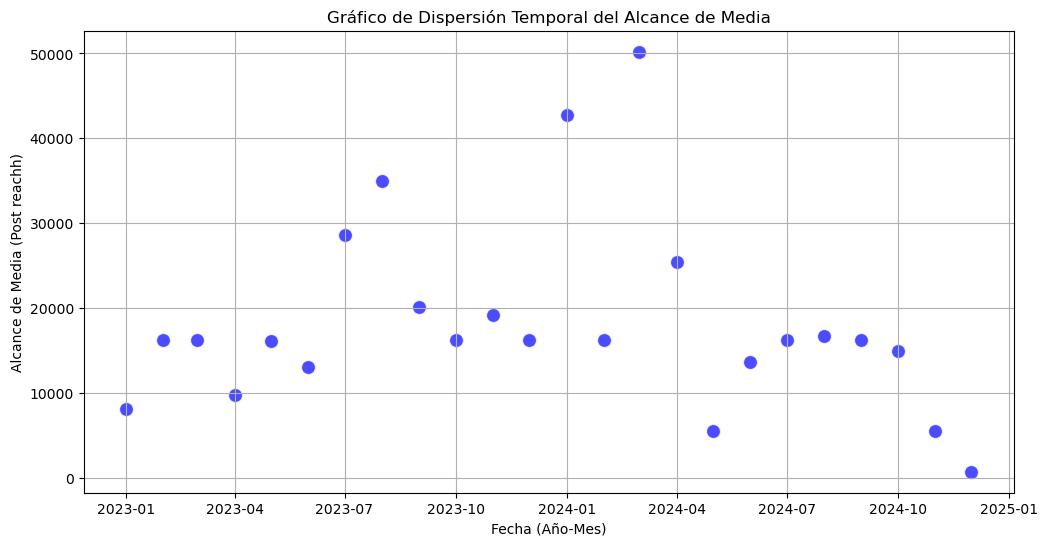

In [942]:
# Creamos un grafico de dispersion para identificar valores que estén fuera de lo común

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_facebook, 
    x="year_month", 
    y="Post reach", 
    s=100,  
    color="blue",  
    alpha=0.7  
)
plt.xlabel("Fecha (Año-Mes)")
plt.ylabel("Alcance de Media (Post reachh)")
plt.title("Gráfico de Dispersión Temporal del Alcance de Media")
plt.grid(True)

plt.show()

# 2. 
### Calculamos tendencia y valores clave en las principales metricas

In [945]:
df_instagram.describe(exclude=["datetime64"])

,Total_Post_count,Post_count_photo,Post_count_video,Comments count,Shares,Interactions,Media reach,Media impressions,Page fans
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,13.04,9.12,3.92,76.17,96.46,1254.83,12262.42,23224.04,237885.50
std,9.35,8.62,2.70,62.84,106.90,770.45,9249.03,13231.36,218506.24
min,2.00,0.00,1.00,7.00,3.00,101.00,843.00,1597.00,7375.00
25%,5.75,1.00,2.00,22.75,35.00,687.25,7141.75,13525.25,78924.25
50%,12.50,9.00,3.00,62.50,54.50,1049.00,10251.00,21995.00,164784.50
75%,19.00,13.00,6.00,111.25,96.50,1879.50,12681.25,27826.50,320620.75
max,43.00,37.00,10.00,211.00,350.00,2529.00,39800.00,48767.00,894625.00


In [947]:
df_facebook.describe(exclude=["datetime64"])

,Total_Post_count,Post_count_photo,Post_count_video,Comments on posts,Shares on posts,Post link clicks,Video views,Total post reactions,Post reach,Post impressions
count,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00,24.00
mean,5.79,4.83,0.71,14.12,19.92,0.17,203.46,100.54,18272.67,18793.21
std,3.23,2.78,1.55,19.66,13.30,0.48,467.94,79.22,11366.61,11608.66
min,1.00,2.00,0.00,0.00,0.00,0.00,0.00,6.00,692.00,717.00
25%,3.00,2.75,0.00,4.00,11.00,0.00,0.00,55.00,13532.50,14060.75
50%,6.00,4.00,0.00,7.00,19.00,0.00,0.00,82.00,16164.00,16650.00
75%,8.00,6.25,1.00,12.50,27.25,0.00,225.50,126.25,19382.75,19882.75
max,14.00,12.00,7.00,84.00,46.00,2.00,2048.00,382.00,50206.00,50772.00


## 2.2
### Principales graficos para la medición y entendimiento de los datos

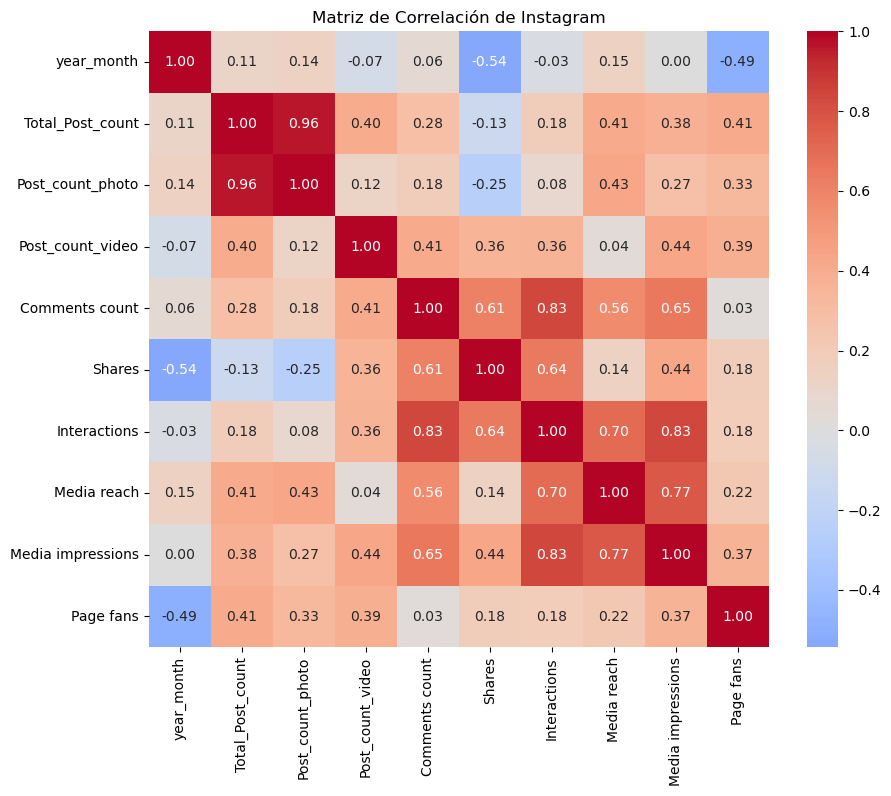

In [950]:
#Creamos un mapa de calor para entender la correlación de las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_instagram.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Instagram')
plt.show()

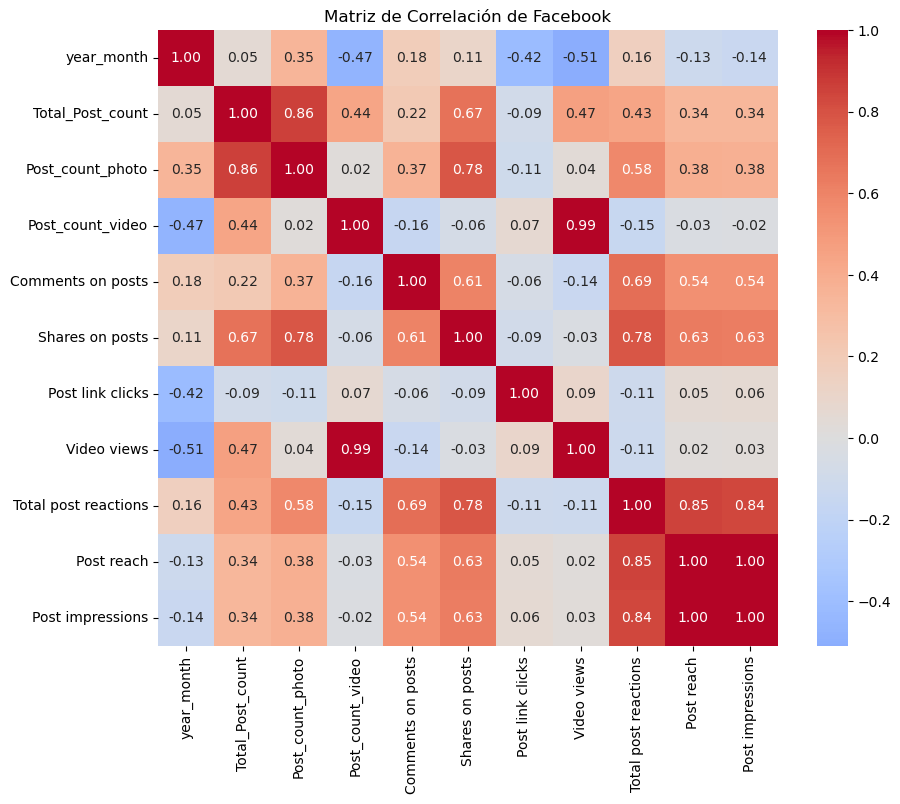

In [952]:
#Creamos un mapa de calor para entender la correlación de las variables
plt.figure(figsize=(10, 8))
sns.heatmap(df_facebook.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de Correlación de Facebook')
plt.show()

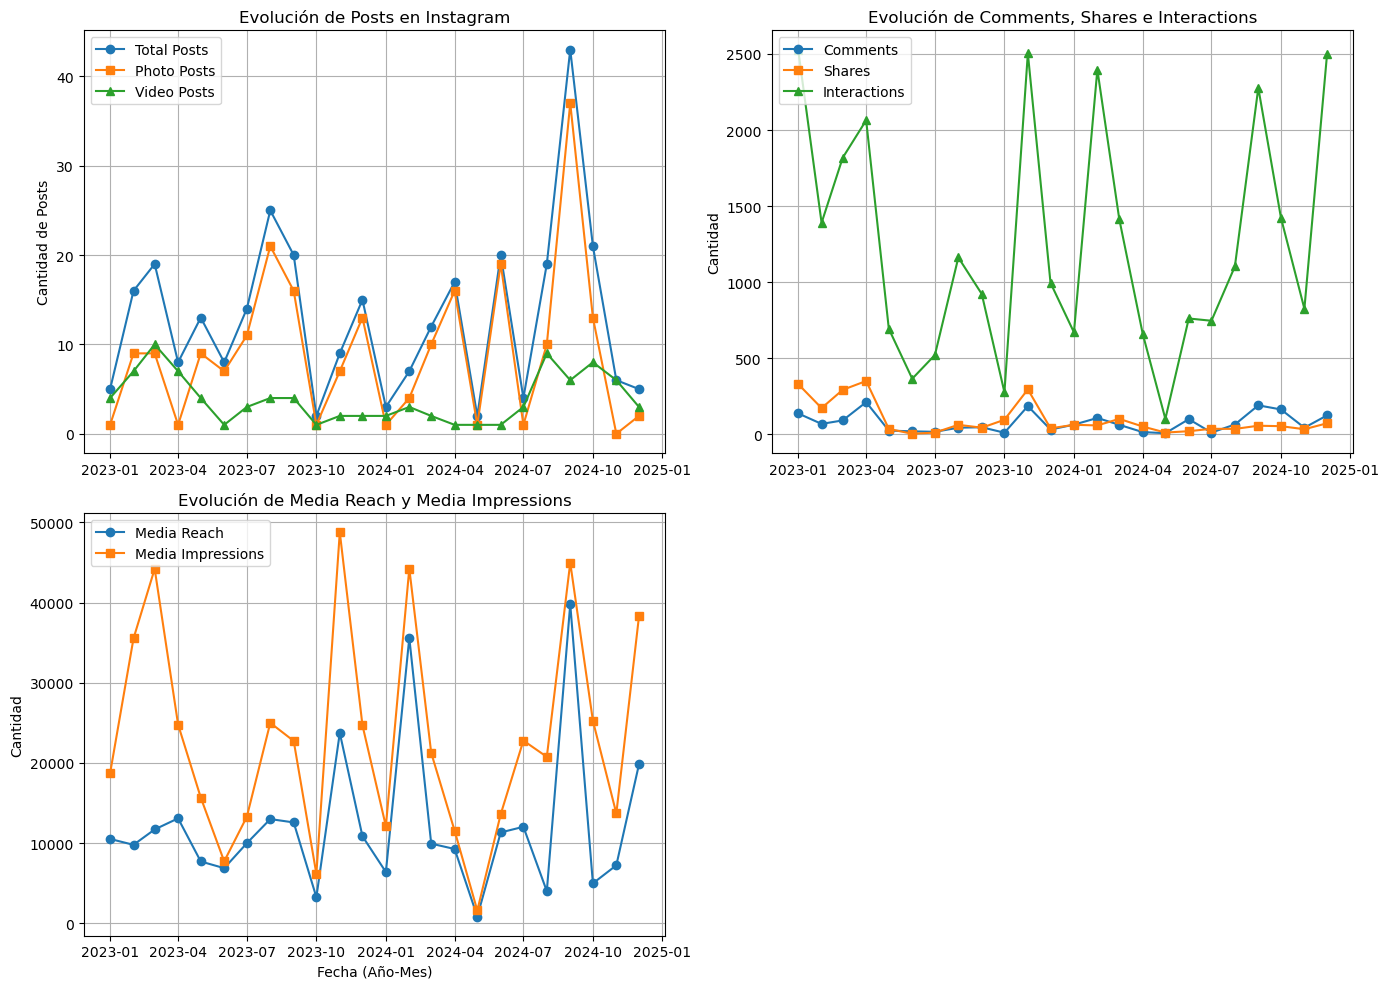

In [954]:
#Creamos graficos de de lineas para entender tendencias

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1
axes[0, 0].plot(df_instagram["year_month"], df_instagram["Total_Post_count"], label="Total Posts", marker='o')
axes[0, 0].plot(df_instagram["year_month"], df_instagram["Post_count_photo"], label="Photo Posts", marker='s')
axes[0, 0].plot(df_instagram["year_month"], df_instagram["Post_count_video"], label="Video Posts", marker='^')
axes[0, 0].set_title("Evolución de Posts en Instagram")
axes[0, 0].set_ylabel("Cantidad de Posts")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Gráfico 2
axes[0, 1].plot(df_instagram["year_month"], df_instagram["Comments count"], label="Comments", marker='o')
axes[0, 1].plot(df_instagram["year_month"], df_instagram["Shares"], label="Shares", marker='s')
axes[0, 1].plot(df_instagram["year_month"], df_instagram["Interactions"], label="Interactions", marker='^')
axes[0, 1].set_title("Evolución de Comments, Shares e Interactions")
axes[0, 1].set_ylabel("Cantidad")
axes[0, 1].legend()
axes[0, 1].grid(True)

# Gráfico 3
axes[1, 0].plot(df_instagram["year_month"], df_instagram["Media reach"], label="Media Reach", marker='o')
axes[1, 0].plot(df_instagram["year_month"], df_instagram["Media impressions"], label="Media Impressions", marker='s')
axes[1, 0].set_title("Evolución de Media Reach y Media Impressions")
axes[1, 0].set_xlabel("Fecha (Año-Mes)")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend()
axes[1, 0].grid(True)

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()



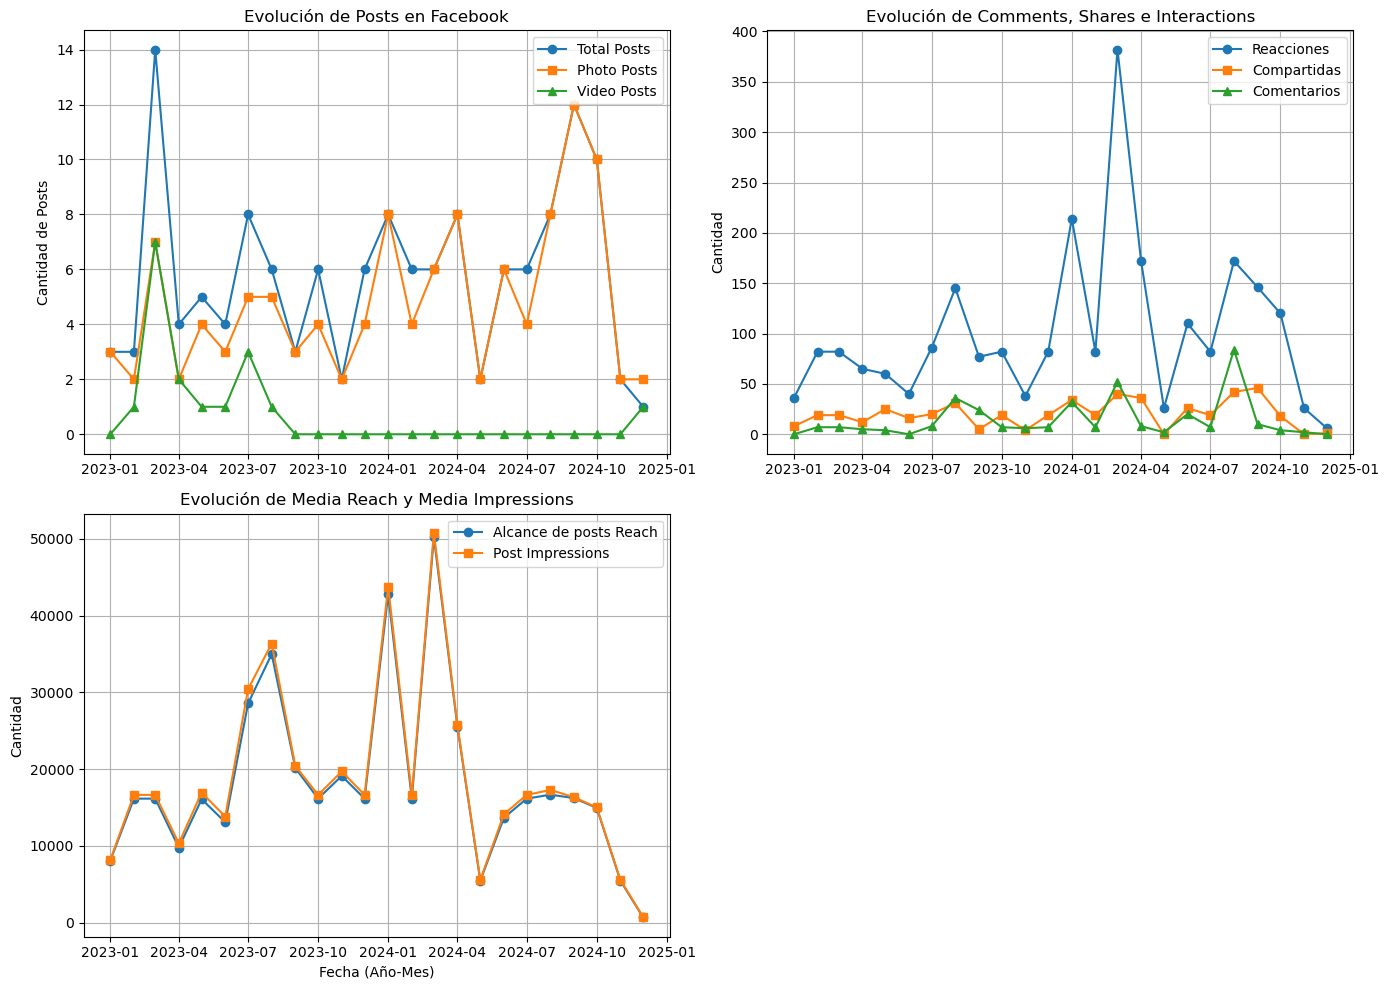

In [1008]:
#Creamos graficos de de lineas para entender tendencias
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1
axes[0, 0].plot(df_facebook["year_month"], df_facebook["Total_Post_count"], label="Total Posts", marker='o')
axes[0, 0].plot(df_facebook["year_month"], df_facebook["Post_count_photo"], label="Photo Posts", marker='s')
axes[0, 0].plot(df_facebook["year_month"], df_facebook["Post_count_video"], label="Video Posts", marker='^')
axes[0, 0].set_title("Evolución de Posts en Facebook")
axes[0, 0].set_ylabel("Cantidad de Posts")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Gráfico 2
axes[0, 1].plot(df_facebook["year_month"], df_facebook["Total post reactions"], label="Reacciones", marker='o')
axes[0, 1].plot(df_facebook["year_month"], df_facebook["Shares on posts"], label="Compartidas", marker='s')
axes[0, 1].plot(df_facebook["year_month"], df_facebook["Comments on posts"], label="Comentarios", marker='^')
axes[0, 1].set_title("Evolución de Comments, Shares e Interactions")
axes[0, 1].set_ylabel("Cantidad")
axes[0, 1].legend()
axes[0, 1].grid(True)

# Gráfico 3
axes[1, 0].plot(df_facebook["year_month"], df_facebook["Post reach"], label="Alcance de posts Reach", marker='o')
axes[1, 0].plot(df_facebook["year_month"], df_facebook["Post impressions"], label="Post Impressions", marker='s')
axes[1, 0].set_title("Evolución de Media Reach y Media Impressions")
axes[1, 0].set_xlabel("Fecha (Año-Mes)")
axes[1, 0].set_ylabel("Cantidad")
axes[1, 0].legend()
axes[1, 0].grid(True)

fig.delaxes(axes[1, 1])
plt.tight_layout()
plt.show()

# 3. Predicción del Tráfico para los Próximos Tres Meses
### Creamos un modelo de predicción utilizando la librería Prophet, escogimos como métrica principal el alcance

23:17:43 - cmdstanpy - INFO - Chain [1] start processing
23:17:43 - cmdstanpy - INFO - Chain [1] done processing



Predicciones para los próximos 3 meses:
        ds  yhat  yhat_lower  yhat_upper
2024-12-31     0           0        2527
2025-01-31 39523       33363       45480
2025-02-28 12810        7165       18776


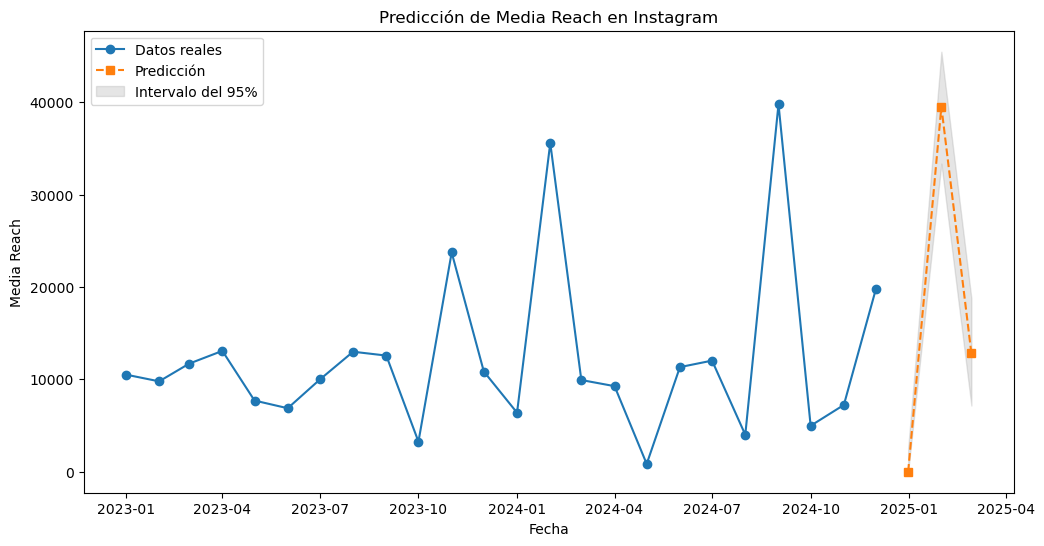

In [1010]:
# Creamos una predicción en Prophet para los siguientes 3 meses
df = df_instagram[['year_month', 'Media reach']].copy()
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df['y'] = df['y'].replace(0, 1)

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    interval_width=0.95
)
model.fit(df)

future = model.make_future_dataframe(periods=3, freq='ME') 
forecast = model.predict(future)

last_date = df['ds'].max()
predictions = forecast[forecast['ds'] > last_date].tail(3) 

predictions['ds'] = predictions['ds'].dt.strftime('%Y-%m-%d')
numeric_cols = ['yhat', 'yhat_lower', 'yhat_upper']
predictions[numeric_cols] = predictions[numeric_cols].clip(lower=0).round().astype(int)

print("\nPredicciones para los próximos 3 meses:")
print(predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_string(index=False))

# Graficamos
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Datos reales', marker='o')
plt.plot(pd.to_datetime(predictions['ds']), predictions['yhat'], label='Predicción', marker='s', linestyle='--')
plt.fill_between(
    pd.to_datetime(predictions['ds']),
    predictions['yhat_lower'],
    predictions['yhat_upper'],
    color='gray',
    alpha=0.2,
    label='Intervalo del 95%'
)
plt.xlabel('Fecha')
plt.ylabel('Media Reach')
plt.legend()
plt.title('Predicción de Media Reach en Instagram')
plt.show()

23:18:20 - cmdstanpy - INFO - Chain [1] start processing
23:18:20 - cmdstanpy - INFO - Chain [1] done processing



Predicciones para los próximos 3 meses:
        ds  yhat  yhat_lower  yhat_upper
2024-12-31 41506       30209       52642
2025-01-31 10710           0       21623
2025-02-28     0           0        1815


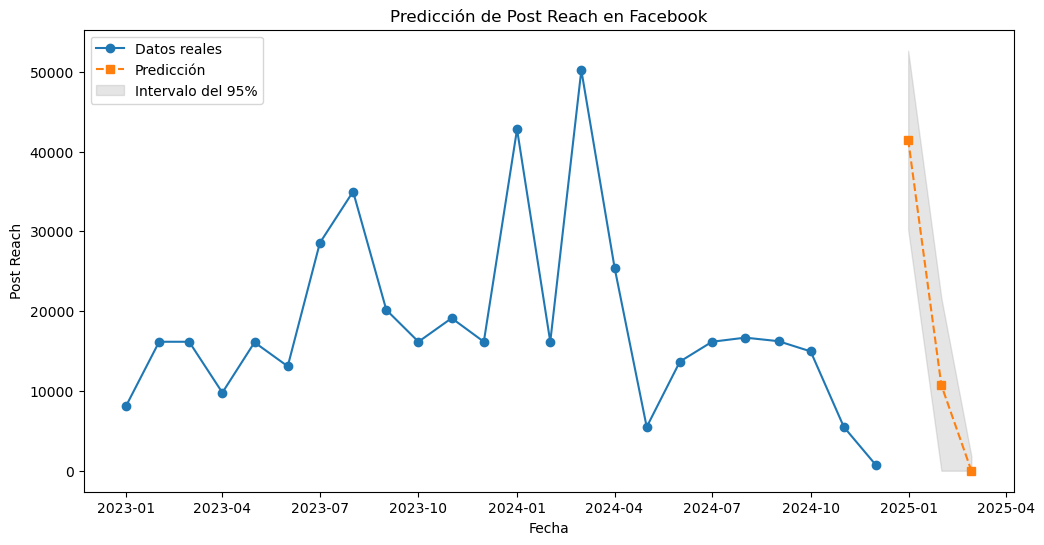

In [1012]:
# Creamos predicciones en Prophet para los proximos 3 meses
df = df_facebook[['year_month', 'Post reach']].copy()
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])

df['y'] = df['y'].replace(0, 1)

model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    interval_width=0.95
)
model.fit(df)

future = model.make_future_dataframe(periods=3, freq='ME') 
forecast = model.predict(future)

last_date = df['ds'].max()
predictions = forecast[forecast['ds'] > last_date].tail(3) 

predictions['ds'] = predictions['ds'].dt.strftime('%Y-%m-%d')
numeric_cols = ['yhat', 'yhat_lower', 'yhat_upper']
predictions[numeric_cols] = predictions[numeric_cols].clip(lower=0).round().astype(int)

print("\nPredicciones para los próximos 3 meses:")
print(predictions[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_string(index=False))

# Graficamos
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Datos reales', marker='o')
plt.plot(pd.to_datetime(predictions['ds']), predictions['yhat'], label='Predicción', marker='s', linestyle='--')
plt.fill_between(
    pd.to_datetime(predictions['ds']),
    predictions['yhat_lower'],
    predictions['yhat_upper'],
    color='gray',
    alpha=0.2,
    label='Intervalo del 95%'
)
plt.xlabel('Fecha')
plt.ylabel('Post Reach')
plt.legend()
plt.title('Predicción de Post Reach en Facebook')
plt.show()

# 4. Comparación Instagram y Facebook

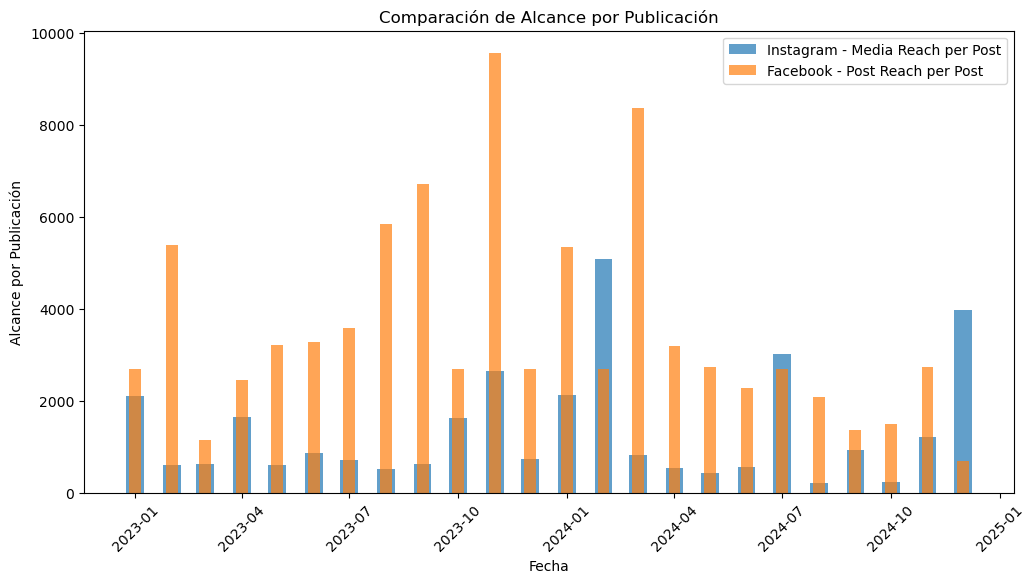

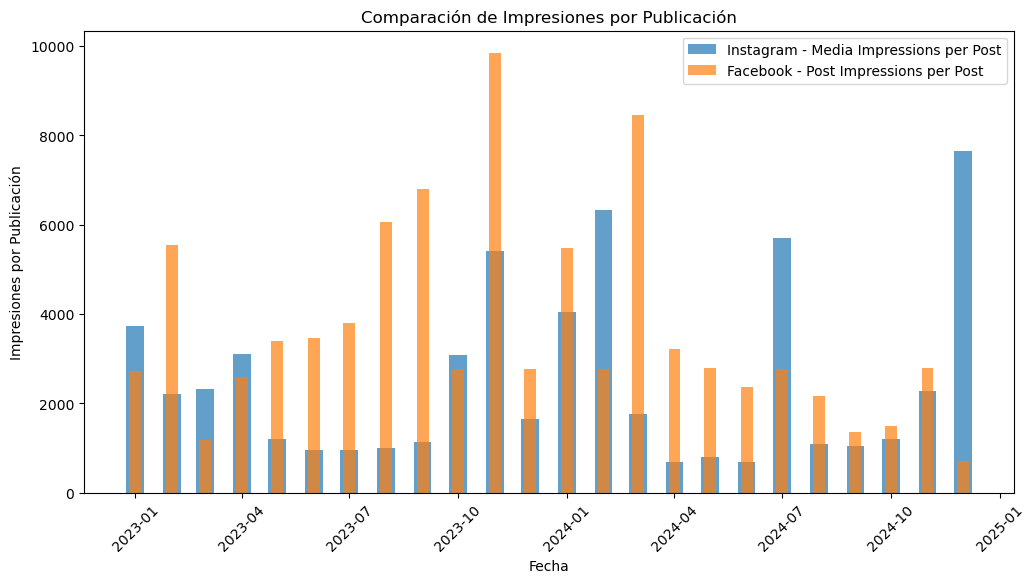

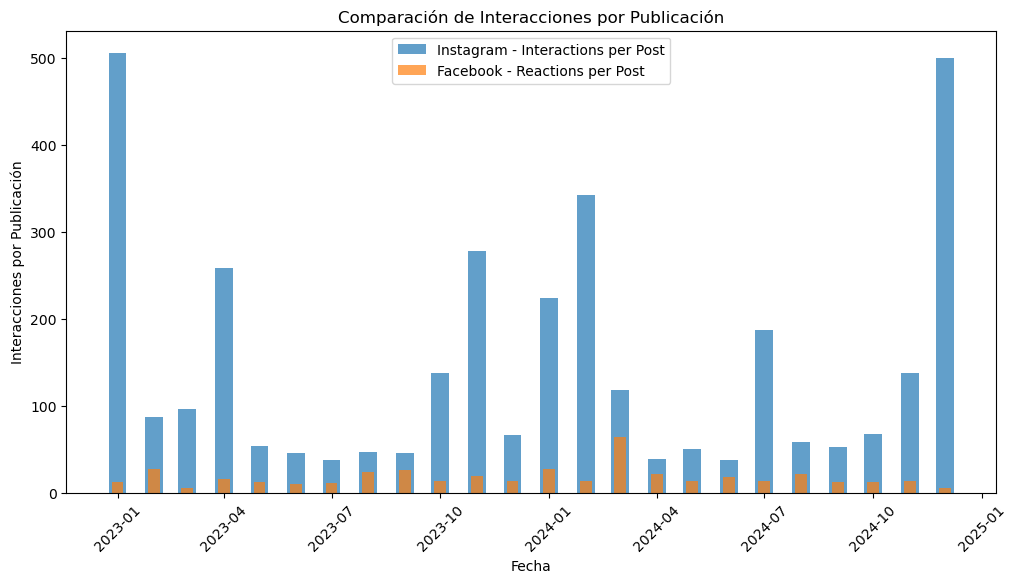

In [1014]:
# Graficamos metricas claves comparando facebook con Instagram
df_instagram["Media reach per post"] = df_instagram["Media reach"] / df_instagram["Total_Post_count"]
df_instagram["Media impressions per post"] = df_instagram["Media impressions"] / df_instagram["Total_Post_count"]
df_instagram["Interactions per post"] = df_instagram["Interactions"] / df_instagram["Total_Post_count"]

df_facebook["Post reach per post"] = df_facebook["Post reach"] / df_facebook["Total_Post_count"]
df_facebook["Post impressions per post"] = df_facebook["Post impressions"] / df_facebook["Total_Post_count"]
df_facebook["Total reactions per post"] = df_facebook["Total post reactions"] / df_facebook["Total_Post_count"]

df_instagram["year_month"] = pd.to_datetime(df_instagram["year_month"])
df_facebook["year_month"] = pd.to_datetime(df_facebook["year_month"])

df_instagram = df_instagram.sort_values("year_month")
df_facebook = df_facebook.sort_values("year_month")

plt.figure(figsize=(12, 6))
plt.bar(df_instagram["year_month"], df_instagram["Media reach per post"], width=15, label="Instagram - Media Reach per Post", alpha=0.7)
plt.bar(df_facebook["year_month"], df_facebook["Post reach per post"], width=10, label="Facebook - Post Reach per Post", alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.title("Comparación de Alcance por Publicación")
plt.xlabel("Fecha")
plt.ylabel("Alcance por Publicación")
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(df_instagram["year_month"], df_instagram["Media impressions per post"], width=15, label="Instagram - Media Impressions per Post", alpha=0.7)
plt.bar(df_facebook["year_month"], df_facebook["Post impressions per post"], width=10, label="Facebook - Post Impressions per Post", alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.title("Comparación de Impresiones por Publicación")
plt.xlabel("Fecha")
plt.ylabel("Impresiones por Publicación")
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(df_instagram["year_month"], df_instagram["Interactions per post"], width=15, label="Instagram - Interactions per Post", alpha=0.7)
plt.bar(df_facebook["year_month"], df_facebook["Total reactions per post"], width=10, label="Facebook - Reactions per Post", alpha=0.7)
plt.xticks(rotation=45)
plt.legend()
plt.title("Comparación de Interacciones por Publicación")
plt.xlabel("Fecha")
plt.ylabel("Interacciones por Publicación")
plt.show()
